In [29]:
import numpy as np, pandas as pd, tensorflow as tf
from sklearn.preprocessing import MinMaxScaler
import matplotlib.pyplot as plt

df = pd.read_csv("/content/drive/MyDrive/2025-2 MLP/source/Alcohol_Sales.csv")
df.head()

,DATE,S4248SM144NCEN
0,1992-01-01,3459
1,1992-02-01,3458
2,1992-03-01,4002
3,1992-04-01,4564
4,1992-05-01,4221


In [30]:
data = df['S4248SM144NCEN'].values.reshape(-1,1)
data

array([[ 3459],
       [ 3458],
       [ 4002],
       [ 4564],
       [ 4221],
       [ 4529],
       [ 4466],
       [ 4137],
       [ 4126],
       [ 4259],
       [ 4240],
       [ 4936],
       [ 3031],
       [ 3261],
       [ 4160],
       [ 4377],
       [ 4307],
       [ 4696],
       [ 4458],
       [ 4457],
       [ 4364],
       [ 4236],
       [ 4500],
       [ 4974],
       [ 3075],
       [ 3377],
       [ 4443],
       [ 4261],
       [ 4460],
       [ 4985],
       [ 4324],
       [ 4719],
       [ 4374],
       [ 4248],
       [ 4784],
       [ 4971],
       [ 3370],
       [ 3484],
       [ 4269],
       [ 3994],
       [ 4715],
       [ 4974],
       [ 4223],
       [ 5000],
       [ 4235],
       [ 4554],
       [ 4851],
       [ 4826],
       [ 3699],
       [ 3983],
       [ 4262],
       [ 4619],
       [ 5219],
       [ 4836],
       [ 4941],
       [ 5062],
       [ 4365],
       [ 5012],
       [ 4850],
       [ 5097],
       [ 3758],
       [ 3825],
       [

In [31]:
scaler = MinMaxScaler()
data = scaler.fit_transform(data)
data

array([[0.03431412],
       [0.03423395],
       [0.07784815],
       [0.12290548],
       [0.09540608],
       [0.12009941],
       [0.1150485 ],
       [0.08867153],
       [0.08778963],
       [0.09845266],
       [0.09692937],
       [0.1527299 ],
       [0.        ],
       [0.01843983],
       [0.09051551],
       [0.10791309],
       [0.10230097],
       [0.13348833],
       [0.11440712],
       [0.11432695],
       [0.10687084],
       [0.09660867],
       [0.11777439],
       [0.15577648],
       [0.00352762],
       [0.02773992],
       [0.11320452],
       [0.098613  ],
       [0.11456747],
       [0.15665838],
       [0.10366391],
       [0.13533232],
       [0.10767257],
       [0.09757075],
       [0.14054357],
       [0.15553596],
       [0.02717871],
       [0.03631845],
       [0.09925439],
       [0.07720677],
       [0.13501163],
       [0.15577648],
       [0.09556642],
       [0.15786098],
       [0.0965285 ],
       [0.12210374],
       [0.14591518],
       [0.143

In [32]:
window = 12
X, y = [], []
for i in range(len(data)-window):
  X.append(data[i:i+window])
  y.append(data[i+window])
X, y = np.array(X), np.array(y)

In [34]:
train_size = int(len(X) * 0.8)

X_train, X_test = X[0:train_size], X[train_size:len(X)]
y_train, y_test = y[0:train_size], y[train_size:len(y)]

In [35]:
model = tf.keras.Sequential([
    tf.keras.layers.SimpleRNN(64, return_sequences=True, input_shape=(window,1)),
    tf.keras.layers.SimpleRNN(32),
    tf.keras.layers.Dense(1)
])

/usr/local/lib/python3.12/dist-packages/keras/src/layers/rnn/rnn.py:199: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


In [36]:
model.compile(optimizer='adam', loss='mse')
model.fit(X_train, y_train, epochs=50, batch_size=8, verbose=1)

Epoch 1/50
32/32 ━━━━━━━━━━━━━━━━━━━━ 3s 8ms/step - loss: 0.1101
Epoch 2/50
32/32 ━━━━━━━━━━━━━━━━━━━━ 0s 9ms/step - loss: 0.0050
Epoch 3/50
32/32 ━━━━━━━━━━━━━━━━━━━━ 0s 8ms/step - loss: 0.0020
Epoch 4/50
32/32 ━━━━━━━━━━━━━━━━━━━━ 0s 8ms/step - loss: 0.0017
Epoch 5/50
32/32 ━━━━━━━━━━━━━━━━━━━━ 0s 9ms/step - loss: 0.0016
Epoch 6/50
32/32 ━━━━━━━━━━━━━━━━━━━━ 0s 10ms/step - loss: 0.0017
Epoch 7/50
32/32 ━━━━━━━━━━━━━━━━━━━━ 0s 9ms/step - loss: 0.0012
Epoch 8/50
32/32 ━━━━━━━━━━━━━━━━━━━━ 0s 14ms/step - loss: 0.0014
Epoch 9/50
32/32 ━━━━━━━━━━━━━━━━━━━━ 1s 15ms/step - loss: 9.2345e-04
Epoch 10/50
32/32 ━━━━━━━━━━━━━━━━━━━━ 1s 15ms/step - loss: 0.0013
Epoch 11/50
32/32 ━━━━━━━━━━━━━━━━━━━━ 1s 17ms/step - loss: 9.5272e-04
Epoch 12/50
32/32 ━━━━━━━━━━━━━━━━━━━━ 0s 14ms/step - loss: 0.0015
Epoch 13/50
32/32 ━━━━━━━━━━━━━━━━━━━━ 0s 13ms/step - loss: 0.0012
Epoch 14/50
32/32 ━━━━━━━━━━━━━━━━━━━━ 0s 14ms/step - loss: 0.0010
Epoch 15/50
32/32 ━━━━━━━━━━━━━━━━━━━━ 0s 13ms/step - loss: 0.0011
Ep

1/2 ━━━━━━━━━━━━━━━━━━━━ 0s 244ms/step

2/2 ━━━━━━━━━━━━━━━━━━━━ 1s 258ms/step


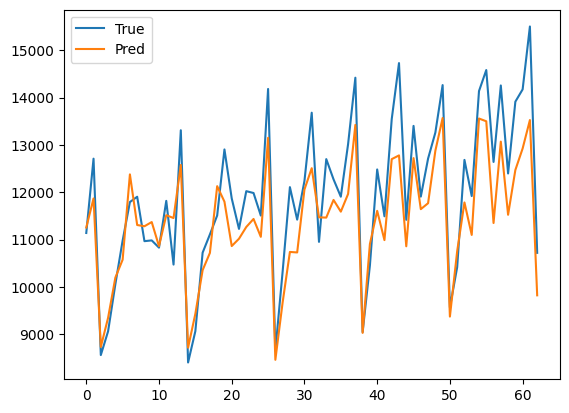

In [37]:
pred = model.predict(X_test)
plt.plot(scaler.inverse_transform(y_test), label='True')
plt.plot(scaler.inverse_transform(pred), label='Pred')
plt.legend()
plt.show()

In [48]:
model_LSTM = tf.keras.Sequential([
    tf.keras.layers.LSTM(64, return_sequences=True, input_shape=(window,1)),
    tf.keras.layers.LSTM(32),
    tf.keras.layers.Dense(1)
])
model_LSTM.compile(optimizer='adam', loss='mse')
model_LSTM.fit(X, y, epochs=50, batch_size=8, verbose=1)

Epoch 1/50


/usr/local/lib/python3.12/dist-packages/keras/src/layers/rnn/rnn.py:199: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


40/40 ━━━━━━━━━━━━━━━━━━━━ 5s 11ms/step - loss: 0.0726
Epoch 2/50
40/40 ━━━━━━━━━━━━━━━━━━━━ 0s 11ms/step - loss: 0.0092
Epoch 3/50
40/40 ━━━━━━━━━━━━━━━━━━━━ 1s 11ms/step - loss: 0.0069
Epoch 4/50
40/40 ━━━━━━━━━━━━━━━━━━━━ 0s 12ms/step - loss: 0.0073
Epoch 5/50
40/40 ━━━━━━━━━━━━━━━━━━━━ 1s 11ms/step - loss: 0.0080
Epoch 6/50
40/40 ━━━━━━━━━━━━━━━━━━━━ 1s 12ms/step - loss: 0.0078
Epoch 7/50
40/40 ━━━━━━━━━━━━━━━━━━━━ 0s 12ms/step - loss: 0.0061
Epoch 8/50
40/40 ━━━━━━━━━━━━━━━━━━━━ 0s 12ms/step - loss: 0.0076
Epoch 9/50
40/40 ━━━━━━━━━━━━━━━━━━━━ 0s 12ms/step - loss: 0.0055
Epoch 10/50
40/40 ━━━━━━━━━━━━━━━━━━━━ 0s 11ms/step - loss: 0.0078
Epoch 11/50
40/40 ━━━━━━━━━━━━━━━━━━━━ 0s 12ms/step - loss: 0.0063
Epoch 12/50
40/40 ━━━━━━━━━━━━━━━━━━━━ 0s 11ms/step - loss: 0.0068
Epoch 13/50
40/40 ━━━━━━━━━━━━━━━━━━━━ 1s 13ms/step - loss: 0.0063
Epoch 14/50
40/40 ━━━━━━━━━━━━━━━━━━━━ 0s 12ms/step - loss: 0.0068
Epoch 15/50
40/40 ━━━━━━━━━━━━━━━━━━━━ 1s 12ms/step - loss: 0.0069
Epoch 16/50
40/

2/2 ━━━━━━━━━━━━━━━━━━━━ 1s 299ms/step


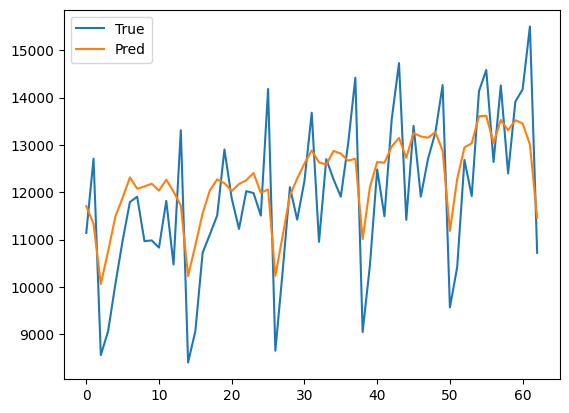

In [49]:
pred = model_LSTM.predict(X_test)
plt.plot(scaler.inverse_transform(y_test), label='True')
plt.plot(scaler.inverse_transform(pred), label='Pred')
plt.legend()
plt.show()

In [50]:
loss_rnn = model.evaluate(X_test, y_test, verbose=0)
print(f'SimpleRNN Test Loss (MSE): {loss_rnn:.4f}')

loss_lstm = model_LSTM.evaluate(X_test, y_test, verbose=0)
print(f'LSTM Test Loss (MSE): {loss_lstm:.4f}')

SimpleRNN Test Loss (MSE): 0.0042
LSTM Test Loss (MSE): 0.0082
